In [17]:
import pandas as pd
import numpy as np

# GPU INTEGRATED SHIT
# import cudf
# import cuml
# import cupy as xp


import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#Train Test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import math

# ML
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import label_binarize


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
import tensorflow as tf


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_percentage_error, precision_score, recall_score, f1_score
from scipy.stats import uniform
from math import sqrt



In [2]:
df = pd.read_csv('scaled_n_comp_crypto.csv')

In [3]:
df = df.set_index(['id','timestamp'])
df

price  market_cap  total_volume   log_ret      csad  \
id         timestamp                                                            
bitcoin    2021-06-26  0.472413    0.468176      0.366467  0.833512  0.000000   
           2021-06-27  0.473608    0.469375      0.349752  0.833823  0.174231   
           2021-06-28  0.511813    0.507713      0.325682  0.843062  0.180448   
           2021-06-29  0.511067    0.506524      0.307834  0.833332  0.222046   
           2021-06-30  0.531952    0.527238      0.333136  0.838442  0.205740   
...                         ...         ...           ...       ...       ...   
blockstack 2023-06-21  0.000011    0.000811      0.000835  0.861626  0.146884   
           2023-06-22  0.000012    0.000891      0.001144  0.844626  0.161184   
           2023-06-23  0.000011    0.000843      0.000904  0.826067  0.116501   
           2023-06-24  0.000011    0.000826      0.000927  0.832149  0.166468   
           2023-06-25  0.000011    0.000799      0.000424  0.829208  0.139294   

                       Volatility  Liquidity   Bitcoin  Collapse  Sell  ...  \
id         timestamp                                                    ...   
bitcoin    2021-06-26         0.0   0.000000  0.644737  1.000000   NaN  ...   
           2021-06-27         0.0   0.333333  0.578947  0.743902   NaN  ...   
           2021-06-28         1.0   0.333333  0.605263  0.548780   NaN  ...   
           2021-06-29         1.0   0.333333  0.644737  0.426829   NaN  ...   
           2021-06-30         1.0   0.333333  0.526316  0.365854   NaN  ...   
...                           ...        ...       ...       ...   ...  ...   
blockstack 2023-06-21         1.0   0.333333  0.723684  0.060976   NaN  ...   
           2023-06-22         1.0   0.666667  0.723684  0.060976   NaN  ...   
           2023-06-23         1.0   0.333333  0.697368  0.060976   NaN  ...   
           2023-06-24         1.0   0.333333  0.592105  0.060976   NaN  ...   
           2023-06-25         1.0   0.333333  0.513158  0.085366   NaN  ...   

                       d_volatility  GEPU_current  GEPU_ppp          Open  \
id         timestamp                                                        
bitcoin    2021-06-26      0.000000      0.000000  0.000000  4.677245e-01   
           2021-06-27      0.000000      0.000000  0.000000  4.779815e-01   
           2021-06-28      0.000000      0.000000  0.000000  5.133865e-01   
           2021-06-29      0.000000      0.000000  0.000000  5.103730e-01   
           2021-06-30      0.000000      0.000000  0.000000  5.315844e-01   
...                             ...           ...       ...           ...   
blockstack 2023-06-21      0.034974      0.378947  0.303319  6.019268e-08   
           2023-06-22      0.030330      0.378947  0.303319  6.339033e-08   
           2023-06-23      0.035114      0.378947  0.303319  6.293141e-08   
           2023-06-24      0.036019      0.378947  0.303319  6.122896e-08   
           2023-06-25      0.037716      0.378947  0.303319  6.131778e-08   

                               High           Low         Close     Adj Close  \
id         timestamp                                                            
bitcoin    2021-06-26  2.012328e-01  4.541842e-01  4.763621e-01  4.763621e-01   
           2021-06-27  2.136784e-01  4.825816e-01  5.128204e-01  5.128204e-01   
           2021-06-28  2.171544e-01  5.101222e-01  5.096337e-01  5.096337e-01   
           2021-06-29  2.253068e-01  5.153948e-01  5.308489e-01  5.308489e-01   
           2021-06-30  2.224252e-01  5.128920e-01  5.186100e-01  5.186100e-01   
...                             ...           ...           ...           ...   
blockstack 2023-06-21  3.224648e-08  5.978146e-08  6.316709e-08  6.316709e-08   
           2023-06-22  2.680835e-08  6.110560e-08  6.293029e-08  6.293029e-08   
           2023-06-23  2.634593e-08  6.146672e-08  6.119867e-08  6.119867e-08   
           2023-06-24  2.644458e-08  6.140653e-08  

In [4]:
df

price  market_cap  total_volume   log_ret      csad  \
id         timestamp                                                            
bitcoin    2021-06-26  0.472413    0.468176      0.366467  0.833512  0.000000   
           2021-06-27  0.473608    0.469375      0.349752  0.833823  0.174231   
           2021-06-28  0.511813    0.507713      0.325682  0.843062  0.180448   
           2021-06-29  0.511067    0.506524      0.307834  0.833332  0.222046   
           2021-06-30  0.531952    0.527238      0.333136  0.838442  0.205740   
...                         ...         ...           ...       ...       ...   
blockstack 2023-06-21  0.000011    0.000811      0.000835  0.861626  0.146884   
           2023-06-22  0.000012    0.000891      0.001144  0.844626  0.161184   
           2023-06-23  0.000011    0.000843      0.000904  0.826067  0.116501   
           2023-06-24  0.000011    0.000826      0.000927  0.832149  0.166468   
           2023-06-25  0.000011    0.000799      0.000424  0.829208  0.139294   

                       Volatility  Liquidity   Bitcoin  Collapse  Sell  ...  \
id         timestamp                                                    ...   
bitcoin    2021-06-26         0.0   0.000000  0.644737  1.000000   NaN  ...   
           2021-06-27         0.0   0.333333  0.578947  0.743902   NaN  ...   
           2021-06-28         1.0   0.333333  0.605263  0.548780   NaN  ...   
           2021-06-29         1.0   0.333333  0.644737  0.426829   NaN  ...   
           2021-06-30         1.0   0.333333  0.526316  0.365854   NaN  ...   
...                           ...        ...       ...       ...   ...  ...   
blockstack 2023-06-21         1.0   0.333333  0.723684  0.060976   NaN  ...   
           2023-06-22         1.0   0.666667  0.723684  0.060976   NaN  ...   
           2023-06-23         1.0   0.333333  0.697368  0.060976   NaN  ...   
           2023-06-24         1.0   0.333333  0.592105  0.060976   NaN  ...   
           2023-06-25         1.0   0.333333  0.513158  0.085366   NaN  ...   

                       d_volatility  GEPU_current  GEPU_ppp          Open  \
id         timestamp                                                        
bitcoin    2021-06-26      0.000000      0.000000  0.000000  4.677245e-01   
           2021-06-27      0.000000      0.000000  0.000000  4.779815e-01   
           2021-06-28      0.000000      0.000000  0.000000  5.133865e-01   
           2021-06-29      0.000000      0.000000  0.000000  5.103730e-01   
           2021-06-30      0.000000      0.000000  0.000000  5.315844e-01   
...                             ...           ...       ...           ...   
blockstack 2023-06-21      0.034974      0.378947  0.303319  6.019268e-08   
           2023-06-22      0.030330      0.378947  0.303319  6.339033e-08   
           2023-06-23      0.035114      0.378947  0.303319  6.293141e-08   
           2023-06-24      0.036019      0.378947  0.303319  6.122896e-08   
           2023-06-25      0.037716      0.378947  0.303319  6.131778e-08   

                               High           Low         Close     Adj Close  \
id         timestamp                                                            
bitcoin    2021-06-26  2.012328e-01  4.541842e-01  4.763621e-01  4.763621e-01   
           2021-06-27  2.136784e-01  4.825816e-01  5.128204e-01  5.128204e-01   
           2021-06-28  2.171544e-01  5.101222e-01  5.096337e-01  5.096337e-01   
           2021-06-29  2.253068e-01  5.153948e-01  5.308489e-01  5.308489e-01   
           2021-06-30  2.224252e-01  5.128920e-01  5.186100e-01  5.186100e-01   
...                             ...           ...           ...           ...   
blockstack 2023-06-21  3.224648e-08  5.978146e-08  6.316709e-08  6.316709e-08   
           2023-06-22  2.680835e-08  6.110560e-08  6.293029e-08  6.293029e-08   
           2023-06-23  2.634593e-08  6.146672e-08  6.119867e-08  6.119867e-08   
           2023-06-24  2.644458e-08  6.140653e-08  

In [5]:
df.movement.unique()

array([ 0,  1, -1], dtype=int64)

In [6]:
def train_test_split(data, train_size, test_size):
    total_size = train_size + test_size
    if total_size > 1.0:
        raise ValueError('train_size and test_size should sum to less than or equal to 1.0')

    train_end = int(len(data) * train_size)
    test_end = int(len(data) * total_size)
    
    x_train = data.drop(columns=['movement']).iloc[0:train_end]
    x_test = data.drop(columns=['movement']).iloc[train_end:test_end]
    y_train = data[['movement']].iloc[0:train_end]
    y_test = data[['movement']].iloc[train_end:test_end]

    return x_train, x_test, y_train, y_test


In [7]:
crypto = list(set(df.crypto_coin))
# loop each crypto token and split the data into train and test
X_train=[]
X_test = []
Y_train = []
Y_test = []
for i in range(0,len(crypto)):
    data = df[df.crypto_coin == crypto[i]]
    # applying the function above
    x_train,x_test,y_train,y_test = train_test_split(data,0.8,0.2)
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)

X_train = pd.concat(X_train)
Y_train = pd.DataFrame(pd.concat(Y_train))
X_test = pd.concat(X_test)
Y_test = pd.DataFrame(pd.concat(Y_test))

X_train.drop(columns='crypto_coin',inplace=True)
X_test.drop(columns='crypto_coin',inplace=True)
X_train.drop(columns='Sell',inplace=True)
X_test.drop(columns='Sell',inplace=True)



In [8]:
X_train

price  market_cap  total_volume   log_ret  \
id         timestamp                                                      
blockstack 2021-06-26  9.549701e-06    0.000532      0.000144  0.833512   
           2021-06-27  9.494022e-06    0.000526      0.000093  0.832792   
           2021-06-28  1.025065e-05    0.000569      0.000149  0.842952   
           2021-06-29  1.046083e-05    0.000582      0.000098  0.836010   
           2021-06-30  1.113568e-05    0.000620      0.000076  0.841208   
...                             ...         ...           ...       ...   
tron       2023-01-26  9.180049e-07    0.004451      0.002743  0.837240   
           2023-01-27  9.146301e-07    0.004443      0.002323  0.833058   
           2023-01-28  9.387118e-07    0.004553      0.003931  0.836711   
           2023-01-29  9.345133e-07    0.004534      0.002826  0.832960   
           2023-01-30  9.453625e-07    0.004587      0.003637  0.834933   

                           csad  Volatility  Liquidity   Bitcoin  Collapse  \
id         timestamp                                                         
blockstack 2021-06-26  0.000000         0.0   0.000000  0.644737  1.000000   
           2021-06-27  0.174231         0.0   0.333333  0.578947  0.743902   
           2021-06-28  0.180448         1.0   0.333333  0.605263  0.548780   
           2021-06-29  0.222046         1.0   0.333333  0.644737  0.426829   
           2021-06-30  0.205740         1.0   0.333333  0.526316  0.365854   
...                         ...         ...        ...       ...       ...   
tron       2023-01-26  0.220231         1.0   0.666667  0.578947  0.060976   
           2023-01-27  0.215965         1.0   0.333333  0.460526  0.048780   
           2023-01-28  0.157541         1.0   0.333333  0.447368  0.036585   
           2023-01-29  0.155628         1.0   0.333333  0.526316  0.036585   
           2023-01-30  0.146260         1.0   0.666667  0.565789  0.048780   

                          Crash  ...  Sentiment    Crisis  d_volatility  \
id         timestamp             ...                                      
blockstack 2021-06-26  0.481481  ...   0.000000  0.212121      0.000000   
           2021-06-27  1.000000  ...   0.090909  0.181818      0.000000   
           2021-06-28  0.802469  ...   0.090909  0.272727      0.000000   
           2021-06-29  0.481481  ...   0.090909  0.242424      0.000000   
           2021-06-30  0.493827  ...   0.090909  0.272727      0.000000   
...                         ...  ...        ...       ...           ...   
tron       2023-01-26  0.135802  ...   0.000000  0.212121      0.011424   
           2023-01-27  0.111111  ...   0.000000  0.181818      0.011366   
           2023-01-28  0.197531  ...   0.000000  0.121212      0.010002   
           2023-01-29  0.160494  ...   0.000000  0.151515      0.009531   
           2023-01-30  0.123457  ...   0.000000  0.121212      0.009594   

                       GEPU_current  GEPU_ppp          Open          High  \
id         timestamp                                                        
blockstack 2021-06-26      0.000000  0.000000  9.475981e-06  4.099496e-06   
           2021-06-27      0.000000  0.000000  9.597921e-06  4.274921e-06   
           2021-06-28      0.000000  0.000000  1.020626e-05  4.432164e-06   
           2021-06-29      0.000000  0.000000  1.050223e-05  4.707259e-06   
           2021-06-30      0.000000  0.000000  1.115042e-05  4.933933e-06   
...                             ...       ...           ...           ...   
tron       2023-01-26      0.473975  0.469292  9.152071e-07  3.828329e-07   
           2023-01-27      0.473975  0.469292  9.138156e-07  3.957254e-07   
           2023-01-28      0.473975  0.469292  9.412176e-07  3.940421e-07   
           2023-01-29      0.473975  0.469292  9.339785e-07  3.968228e-07   
           2023-01-30      0.473975  0.469292  9.442969e-07  3.943319e-07   

                                Low         Close     Adj Clo

In [9]:
def series_to_supervised(data,n_in=1,n_out=1,dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n,...,t-1)
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)]
    # forecast sequence (t,t+1,...,t+n)
    for i in range(0,n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)'%(j+1)) for j in range(n_vars)]
        else:
            names+= [('var%d(t+%d)'%(j+1,i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols,axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Reshaping Function
def reshape_data(train,test):
    # Frame as supervised learning and drop all time t columns
    reframe_train = series_to_supervised(train,1,1)
    reframe_test = series_to_supervised(test,1,1)
    # split into train and test
    train = reframe_train.values
    test = reframe_test.values
    # split into input and outputs
    train_X, y_train = train[:,:-1], train[:,-1]
    test_X, y_test = test[:,:-1], test[:,-1]
    # reshape input to be 3D [samples,timesteps, features]
    x_train = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0],1,test_X.shape[1]))
    return x_train, x_test, y_train, y_test

def reshape_data_2D(train, test):
  # Frame as supervised learning and drop all time t columns
  reframe_train = series_to_supervised(train, 1, 1)
  reframe_test = series_to_supervised(test, 1, 1)

  # split into train and test
  train = reframe_train.values
  test = reframe_test.values

  # split into input and outputs
  x_train, y_train = train[:, :-1], train[:, -1]
  x_test, y_test = test[:, :-1], test[:, -1]

  return x_train, x_test, y_train, y_test

In [10]:
encoder = LabelEncoder()
# combine X train and Y train as train data
train_data = pd.DataFrame()
train_data[X_train.columns] = X_train
train_data[Y_train.columns] = Y_train
train_data.movement = encoder.fit_transform(train_data.movement)
# combine X test and Y test
test_data = pd.DataFrame()
test_data[X_test.columns] = X_test
test_data[Y_test.columns] = Y_test
test_data.movement = encoder.fit_transform(test_data.movement)

In [11]:
train_data

price  market_cap  total_volume   log_ret  \
id         timestamp                                                      
blockstack 2021-06-26  9.549701e-06    0.000532      0.000144  0.833512   
           2021-06-27  9.494022e-06    0.000526      0.000093  0.832792   
           2021-06-28  1.025065e-05    0.000569      0.000149  0.842952   
           2021-06-29  1.046083e-05    0.000582      0.000098  0.836010   
           2021-06-30  1.113568e-05    0.000620      0.000076  0.841208   
...                             ...         ...           ...       ...   
tron       2023-01-26  9.180049e-07    0.004451      0.002743  0.837240   
           2023-01-27  9.146301e-07    0.004443      0.002323  0.833058   
           2023-01-28  9.387118e-07    0.004553      0.003931  0.836711   
           2023-01-29  9.345133e-07    0.004534      0.002826  0.832960   
           2023-01-30  9.453625e-07    0.004587      0.003637  0.834933   

                           csad  Volatility  Liquidity   Bitcoin  Collapse  \
id         timestamp                                                         
blockstack 2021-06-26  0.000000         0.0   0.000000  0.644737  1.000000   
           2021-06-27  0.174231         0.0   0.333333  0.578947  0.743902   
           2021-06-28  0.180448         1.0   0.333333  0.605263  0.548780   
           2021-06-29  0.222046         1.0   0.333333  0.644737  0.426829   
           2021-06-30  0.205740         1.0   0.333333  0.526316  0.365854   
...                         ...         ...        ...       ...       ...   
tron       2023-01-26  0.220231         1.0   0.666667  0.578947  0.060976   
           2023-01-27  0.215965         1.0   0.333333  0.460526  0.048780   
           2023-01-28  0.157541         1.0   0.333333  0.447368  0.036585   
           2023-01-29  0.155628         1.0   0.333333  0.526316  0.036585   
           2023-01-30  0.146260         1.0   0.666667  0.565789  0.048780   

                          Crash  ...    Crisis  d_volatility  GEPU_current  \
id         timestamp             ...                                         
blockstack 2021-06-26  0.481481  ...  0.212121      0.000000      0.000000   
           2021-06-27  1.000000  ...  0.181818      0.000000      0.000000   
           2021-06-28  0.802469  ...  0.272727      0.000000      0.000000   
           2021-06-29  0.481481  ...  0.242424      0.000000      0.000000   
           2021-06-30  0.493827  ...  0.272727      0.000000      0.000000   
...                         ...  ...       ...           ...           ...   
tron       2023-01-26  0.135802  ...  0.212121      0.011424      0.473975   
           2023-01-27  0.111111  ...  0.181818      0.011366      0.473975   
           2023-01-28  0.197531  ...  0.121212      0.010002      0.473975   
           2023-01-29  0.160494  ...  0.151515      0.009531      0.473975   
           2023-01-30  0.123457  ...  0.121212      0.009594      0.473975   

                       GEPU_ppp          Open          High           Low  \
id         timestamp                                                        
blockstack 2021-06-26  0.000000  9.475981e-06  4.099496e-06  9.019222e-06   
           2021-06-27  0.000000  9.597921e-06  4.274921e-06  9.546045e-06   
           2021-06-28  0.000000  1.020626e-05  4.432164e-06  9.995181e-06   
           2021-06-29  0.000000  1.050223e-05  4.707259e-06  1.053974e-05   
           2021-06-30  0.000000  1.115042e-05  4.933933e-06  1.089157e-05   
...                         ...           ...           ...           ...   
tron       2023-01-26  0.469292  9.152071e-07  3.828329e-07  9.231143e-07   
           2023-01-27  0.469292  9.138156e-07  3.957254e-07  9.184949e-07   
           2023-01-28  0.469292  9.412176e-07  3.940421e-07  9.359343e-07   
           2023-01-29  0.469292  9.339785e-07  3.968228e-07  9.478514e-07   
           2023-01-30  0.469292  9.442969e-07  3.943319e-07  9.276133e-07   

                      

In [12]:
test_data

price  market_cap  total_volume   log_ret      csad  \
id         timestamp                                                            
blockstack 2023-01-31  0.000004    0.000289      0.000132  0.823069  0.192906   
           2023-02-01  0.000004    0.000296      0.000148  0.835715  0.143544   
           2023-02-02  0.000004    0.000307      0.000124  0.838196  0.177158   
           2023-02-03  0.000004    0.000306      0.000135  0.833414  0.163599   
           2023-02-04  0.000005    0.000325      0.000327  0.840625  0.144771   
...                         ...         ...           ...       ...       ...   
tron       2023-06-21  0.000001    0.004961      0.001854  0.834060  0.146884   
           2023-06-22  0.000001    0.005099      0.002122  0.836849  0.161184   
           2023-06-23  0.000001    0.005055      0.002618  0.832470  0.116501   
           2023-06-24  0.000001    0.005159      0.002551  0.835719  0.166468   
           2023-06-25  0.000001    0.005082      0.002244  0.831932  0.139294   

                       Volatility  Liquidity   Bitcoin  Collapse     Crash  \
id         timestamp                                                         
blockstack 2023-01-31         1.0   0.666667  0.552632  0.048780  0.086420   
           2023-02-01         1.0   0.333333  0.526316  0.048780  0.074074   
           2023-02-02         1.0   0.333333  0.618421  0.048780  0.061728   
           2023-02-03         1.0   0.666667  0.565789  0.048780  0.061728   
           2023-02-04         1.0   0.333333  0.434211  0.036585  0.111111   
...                           ...        ...       ...       ...       ...   
tron       2023-06-21         1.0   0.333333  0.723684  0.060976  0.518519   
           2023-06-22         1.0   0.666667  0.723684  0.060976  0.506173   
           2023-06-23         1.0   0.333333  0.697368  0.060976  0.432099   
           2023-06-24         1.0   0.333333  0.592105  0.060976  0.419753   
           2023-06-25         1.0   0.333333  0.513158  0.085366  0.530864   

                       ...    Crisis  d_volatility  GEPU_current  GEPU_ppp  \
id         timestamp   ...                                                   
blockstack 2023-01-31  ...  0.181818      0.016675      0.473975  0.469292   
           2023-02-01  ...  0.181818      0.015747      0.473975  0.469292   
           2023-02-02  ...  0.181818      0.016206      0.473975  0.469292   
           2023-02-03  ...  0.151515      0.016209      0.473975  0.469292   
           2023-02-04  ...  0.121212      0.017216      0.473975  0.469292   
...                    ...       ...           ...           ...       ...   
tron       2023-06-21  ...  0.393939      0.004274      0.378947  0.303319   
           2023-06-22  ...  0.424242      0.005637      0.378947  0.303319   
           2023-06-23  ...  0.393939      0.005848      0.378947  0.303319   
           2023-06-24  ...  0.333333      0.006089      0.378947  0.303319   
           2023-06-25  ...  0.363636      0.006308      0.378947  0.303319   

                               Open          High           Low         Close  \
id         timestamp                                                            
blockstack 2023-01-31  3.911192e-08  1.664116e-08  3.909193e-08  3.973843e-08   
           2023-02-01  3.968927e-08  1.659800e-08  3.865557e-08  3.896883e-08   
           2023-02-02  3.899349e-08  1.653017e-08  3.796341e-08  3.809562e-08   
           2023-02-03  3.809045e-08  1.612324e-08  3.829445e-08  3.800682e-08   
           2023-02-04  3.806085e-08  1.604925e-08  3.710574e-08  3.759241e-08   
...                             ...           ...           ...           ...   
tron       2023-06-21  1.044889e-06  4.478993e-07  1.059289e-06  1.071206e-06   
           2023-06-22  1.071418e-06  4.564202e-07  1.076939e-06  1.064576e-06   
           2023-06-23  1.065023e-06  4.536888e-07  1.077406e-06  1.082573e-06   
           2023-06-24  1.082876e-06  4.526037e-07  

In [13]:
test_data.movement.unique()

array([0, 1, 2], dtype=int64)

In [14]:
train_data.movement.unique()

array([1, 2, 0], dtype=int64)

In [15]:
x_train,x_test,y_train,y_test = reshape_data_2D(train_data,test_data)


### REG

In [31]:
type(x_train)

numpy.ndarray

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize

# Let's assume X_train, X_test, y_train, y_test are already defined
y_test_bin =  label_binarize(y_test, classes=np.unique(y_test))

# Define Logistic Regression with Lasso
logistic = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10, 100],
}

# Use GridSearchCV for hyperparameter tuning
clf = GridSearchCV(logistic, param_grid, cv=5, verbose=0, n_jobs=-1)

# Fit model
clf.fit(x_train, y_train)

# Predict 
y_pred = clf.predict(x_test)


In [16]:
type(y_pred)

numpy.ndarray

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

auc_roc_log = roc_auc_score(y_test_bin, clf.predict_proba(x_test), multi_class='ovr', average='macro')
mse_log = mean_squared_error(y_test,y_pred)
rmse_log = sqrt(mse_log)
mape_log = mean_absolute_percentage_error(y_test,y_pred)
print(f"MSE: {mse_log*100}%")
print(f"RMSE: {rmse_log * 100}%")
print(f"MAPE: {mape_log}")
print(f"AUC-ROC: {auc_roc_log * 100}%")


MSE: 1.3429472735466428%
RMSE: 11.588560193339994%
MAPE: 33690740790603.98
AUC-ROC: 99.92398313489632%


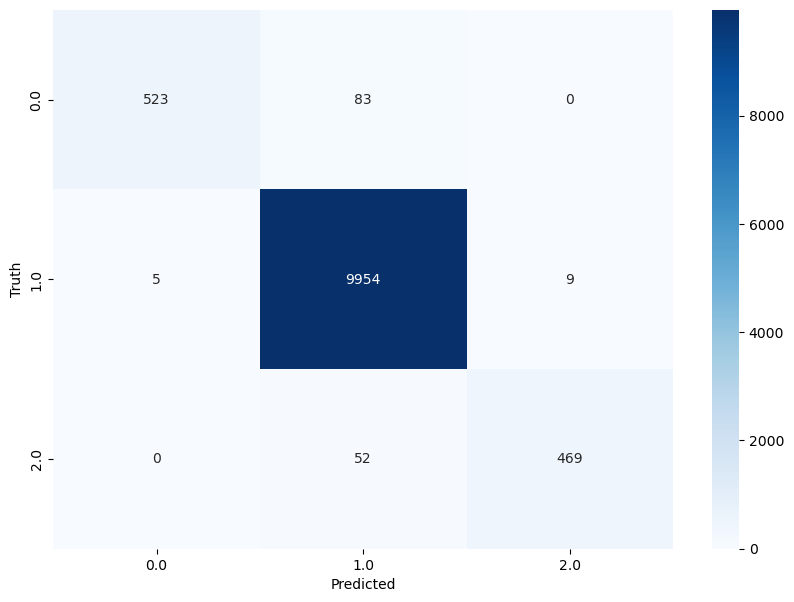

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

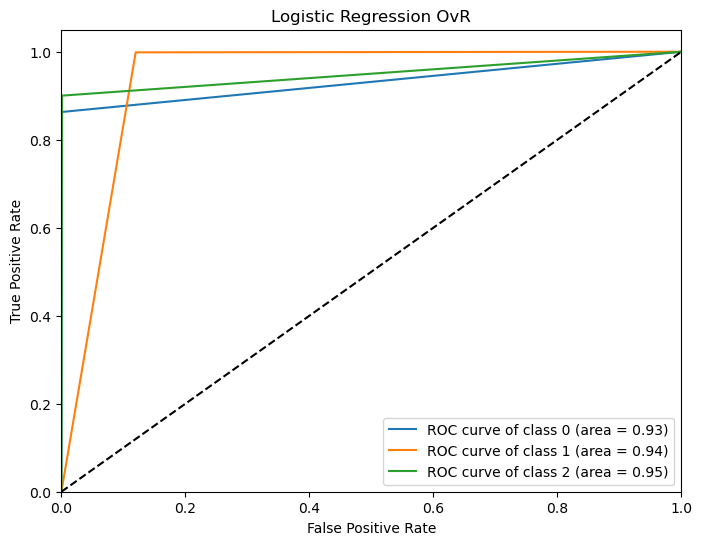

In [100]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)  # Fit has to happen only on y_train
y_test_binarized = label_binarizer.transform(y_test)
y_pred_binarized = label_binarizer.transform(y_pred)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression OvR')
plt.legend(loc="lower right")
plt.show()

In [77]:
coeffs = clf.best_estimator_

In [86]:
features = ['price', 'market_cap', 'total_volume', 'log_ret', 'csad', 'Volatility',
            'Liquidity', 'Bitcoin', 'Collapse', 'Crash', 'Risks', 'Bubble',
            'Sentiment', 'Crisis', 'd_volatility', 'GEPU_current', 'GEPU_ppp',
            'Open', 'High', 'Low', 'Close', 'Adj Close']


In [98]:
x_train.shape

(44383, 45)

In [99]:
clf.best_estimator_.coef_

array([[ 2.86473203e+01,  2.90058065e+01, -2.84088947e+00,
         3.94856055e+01, -5.64854526e-01,  5.86401286e-09,
        -9.38189280e-01,  1.15039276e-01, -2.15640109e+00,
        -1.55759862e-06,  1.28888745e+00, -3.62904223e-01,
         4.37086690e-06, -2.87598569e-06,  8.91040511e+00,
        -2.65442649e+00,  3.94104081e+00,  2.85345263e+01,
        -3.73667773e+00, -5.98547530e+00, -2.55560907e+01,
        -2.55560907e+01, -5.73246757e-01, -2.91183185e-01,
        -2.92996766e+01,  2.09765747e+00, -8.59680352e+02,
         4.06764971e-01, -1.24172696e-01,  2.96922516e-02,
         2.70950151e-01,  1.94115656e+00, -2.47801770e-01,
        -8.63445916e-01, -5.05029238e-01, -7.58693734e-07,
        -2.96735026e-06, -6.04451398e+00,  5.30058793e+00,
        -6.07619898e+00,  0.00000000e+00,  0.00000000e+00,
         4.14907288e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.11070527e-01,  5.48098097e+00,
         5.27775387e-06,  2.64707143e+00, -7.78812869e-

### Bagging

In [102]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, TimeSeriesSplit


base_bag = BaggingClassifier()
base_bag.fit(x_train,y_train)
y_pred_bag = base_bag.predict(x_test)

#CV = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
CV = TimeSeriesSplit(n_splits=5)
n_scores = cross_val_score(base_bag,x_train,y_train,scoring='accuracy',n_jobs=-1,error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

auc_roc_bag = roc_auc_score(y_test,base_bag.predict_proba(x_test),multi_class='ovr',average='macro')
print(f"AUC-ROC: {auc_roc_bag * 100}%")

mse_bag = mean_squared_error(y_test,y_pred_bag)
rmse_bag = sqrt(mse_bag)
mape_bag = mean_absolute_percentage_error(y_test,y_pred_bag)
print(f"MSE: {mse_bag*100}%")
print(f"RMSE: {rmse_bag * 100}%")
print(f"MAPE: {mape_bag}")

Accuracy: 1.000 (0.000)
AUC-ROC: 100.0%
MSE: 0.009013068949977467%
RMSE: 0.9493718423240425%
MAPE: 9.013068949977468e-05


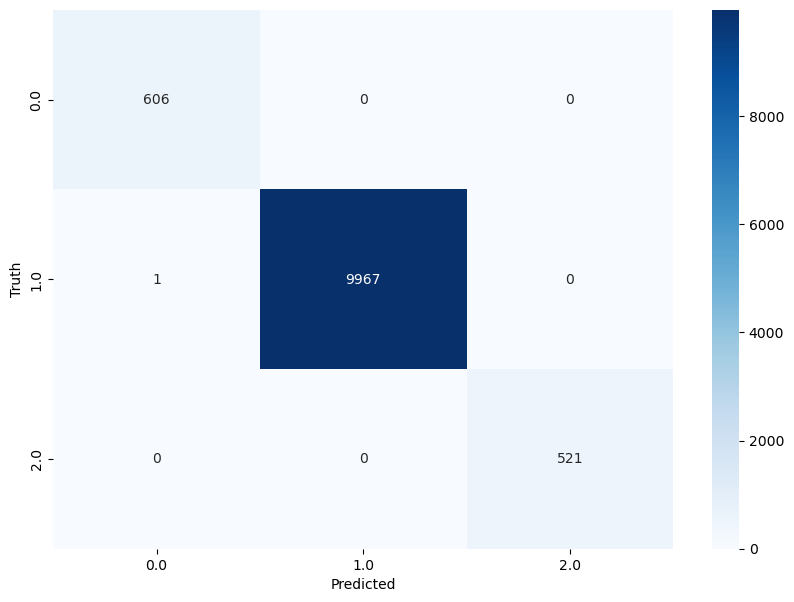

In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_bag)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

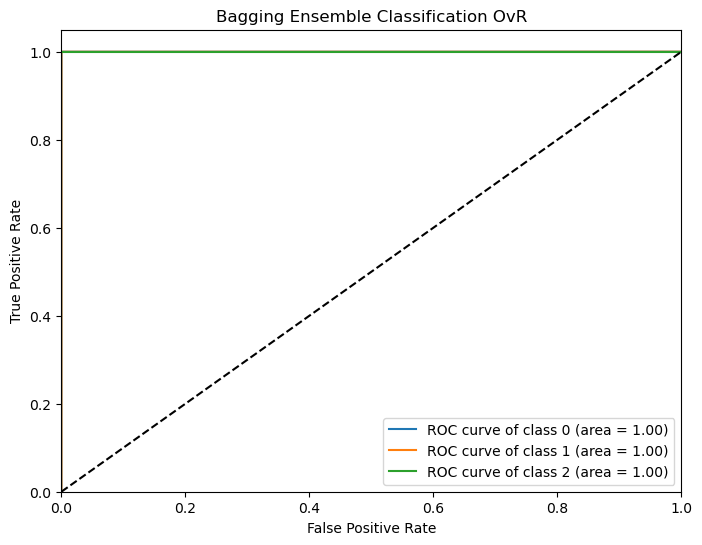

In [104]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)  # Fit has to happen only on y_train
y_test_binarized = label_binarizer.transform(y_test)
y_pred_binarized = label_binarizer.transform(y_pred_bag)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging Ensemble Classification OvR')
plt.legend(loc="lower right")
plt.show()

In [20]:
print(x_train)

[[2.97741366e-02 1.42441142e-03 1.04795727e-03 ... 2.95044841e-02
  3.15250495e-02 3.15250495e-02]
 [2.94219642e-02 1.40148676e-03 9.16279654e-04 ... 3.13689684e-02
  3.27600031e-02 3.27600031e-02]
 [3.14870267e-02 1.49435145e-03 7.64188871e-04 ... 3.31991508e-02
  3.56819511e-02 3.56819511e-02]
 ...
 [3.58030363e-05 1.87495440e-03 2.92040083e-03 ... 3.20668516e-05
  3.19646490e-05 3.19646490e-05]
 [3.52345369e-05 1.85592954e-03 2.86954100e-03 ... 3.24997657e-05
  3.31585198e-05 3.31585198e-05]
 [3.20118657e-05 1.68100196e-03 4.52944681e-03 ... 3.33545948e-05
  3.48684251e-05 3.48684251e-05]]


### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
n_scores = cross_val_score(rf_cls, x_train, y_train, scoring='accuracy', cv=CV, n_jobs=-1, error_score='raise')

rf_cls.fit(x_train, y_train)
y_pred_rf = rf_cls.predict(x_test)

y_pred_prob = rf_cls.predict_proba(x_test)

# Compute ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob,multi_class='ovr',average='macro')
print(f"ROC AUC score: {roc_auc_rf}")
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test,y_pred_rf)
print(f"MSE: {mse_rf*100}%")
print(f"RMSE: {rmse_rf * 100}%")
print(f"MAPE: {mape_rf}")
print(f"AUC-ROC: {roc_auc_rf * 100}%")

ROC AUC score: 0.9999985043458842
Accuracy: 1.000 (0.000)
MSE: 0.009013068949977467%
RMSE: 0.9493718423240425%
MAPE: 9.013068949977468e-05
AUC-ROC: 99.99985043458842%


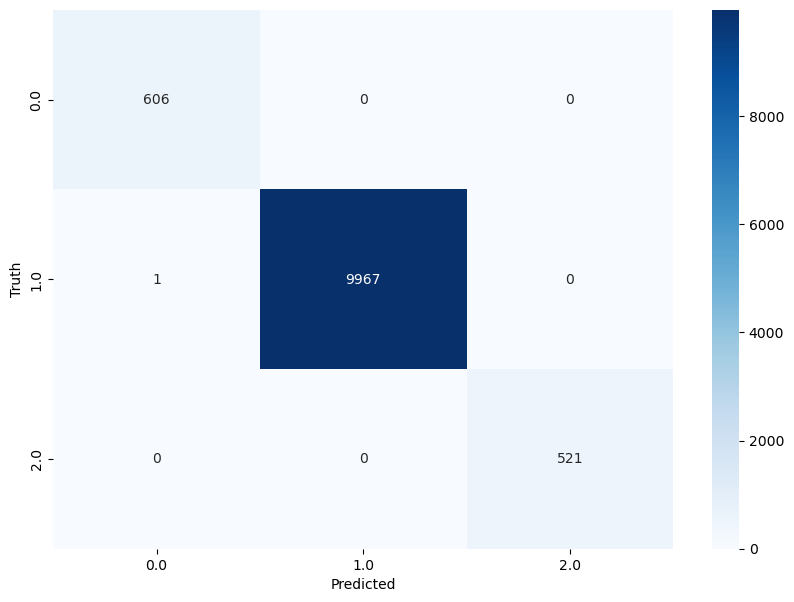

In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

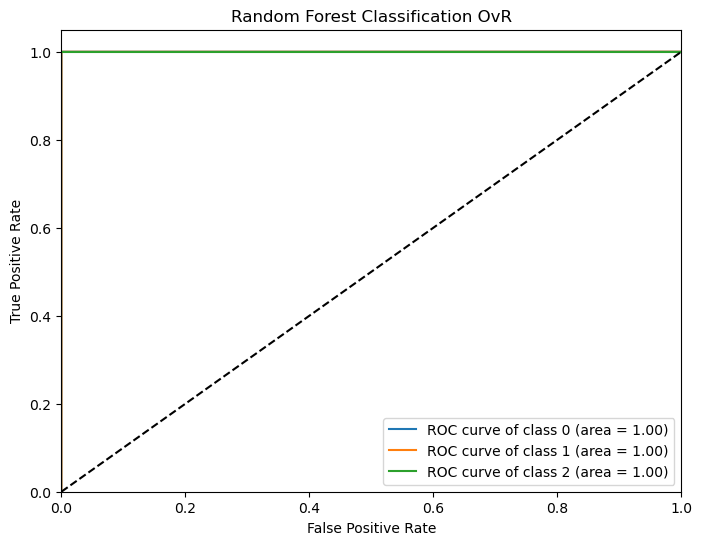

In [107]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)  # Fit has to happen only on y_train
y_test_binarized = label_binarizer.transform(y_test)
y_pred_binarized = label_binarizer.transform(y_pred_rf)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classification OvR')
plt.legend(loc="lower right")
plt.show()

### SVC

In [19]:
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
# define parameter grid (in this case it is the same as param_dist)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # values between 0 and 4
    'gamma' = [0.1, 1, 10, 100]
    'degrees' = [0, 1, 2, 3, 4, 5, 6]
    'kernel': ['linear'],  # type of kernel
}

model_svc = SVC(probability=True, random_state=42)

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(
    model_svc, 
    param_grid=param_grid,  
    cv=tscv, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1  # verbose level
)

grid_search_svc.fit(x_train,y_train)
model_svc = grid_search_svc.best_estimator_
# Print the best parameters
print(f"Best parameters: {grid_search_svc.best_params_}")

n_scores = cross_val_score(model_svc, x_train, y_train, scoring='accuracy', cv=tscv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

y_pred_svc = model_svc.predict(x_test)

# Compute ROC AUC score
y_pred_svc_prob = model_svc.predict_proba(x_test)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc_prob,multi_class='ovo',average='macro')
print(f"ROC AUC score: {roc_auc_svc}")

mse_svc = mean_squared_error(y_test,y_pred_svc)
rmse_svc = sqrt(mse_svc)
mape_svc = mean_absolute_percentage_error(y_test,y_pred_svc)
print(f"MSE: {mse_svc*100}%")
print(f"RMSE: {rmse_svc * 100}%")
print(f"MAPE: {mape_svc}")

# Compute precision, recall, f1-score
precision_svc = precision_score(y_test, y_pred_svc, average='macro')
recall_svc = recall_score(y_test, y_pred_svc, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')

print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1-score: {f1_svc}")



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'C': 1.0, 'kernel': 'linear'}
Accuracy: 0.820 (0.014)
ROC AUC score: 0.9848643219330514
MSE: 9.71608832807571%
RMSE: 31.170640558185053%
MAPE: 233399710296352.88
Precision: 0.9674693705111955
Recall: 0.361901353283121
F1-score: 0.3709408195940984


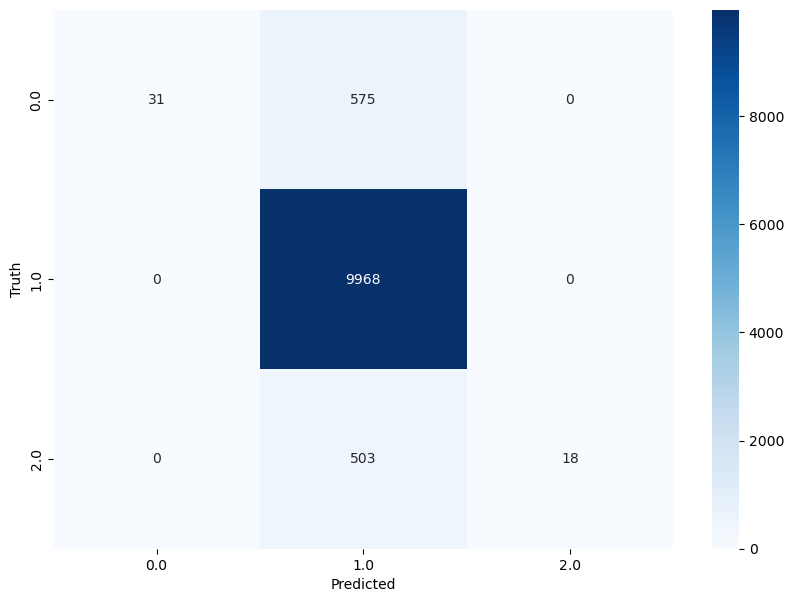

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

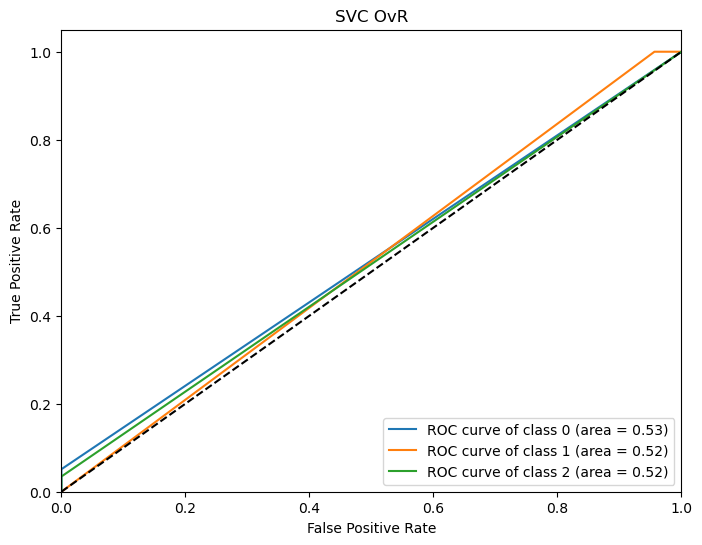

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)  # Fit has to happen only on y_train
y_test_binarized = label_binarizer.transform(y_test)
y_pred_binarized = label_binarizer.transform(y_pred_svc)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC')
plt.legend(loc="lower right")
plt.show()

In [51]:
x_train,x_test,y_train,y_test = reshape_data(train_data,test_data)

In [29]:
print(np.unique(y_train))  # should only print [-1  0  1]
print(np.unique(y_test))   # should only print [-1  0  1]

[0. 1. 2.]
[0. 1. 2.]


In [30]:
y_train

array([0., 2., 1., ..., 1., 1., 1.])

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical

seed = 7
tf.random.set_seed(seed)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

tscv = TimeSeriesSplit(n_splits=5)
def create_model():
    model = Sequential()
    model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(3, activation='softmax'))  # 3 neurons in the output layer, one for each class
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

model_lstm = KerasClassifier(model=create_model,verbose=0)

batch_size = [10,20,30,40,60,80,100]
epochs = [10,50,100]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid_lstm = GridSearchCV(estimator=model_lstm,param_grid=param_grid,n_jobs=-1,cv=tscv)
grid_lstm_res = grid_lstm.fit(x_train,y_train)

print("Best: %f using %s" % (grid_lstm_res.best_score_,grid_lstm_res.best_params_))
# # fit network
#history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)


Best: 0.898418 using {'batch_size': 10, 'epochs': 100}


Epoch 1/100
4439/4439 [==============================] - 6s 1ms/step - loss: 0.5559 - accuracy: 0.8196
Epoch 2/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.5000 - accuracy: 0.8299
Epoch 3/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.4796 - accuracy: 0.8324
Epoch 4/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.4650 - accuracy: 0.8340
Epoch 5/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.4529 - accuracy: 0.8369
Epoch 6/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.4431 - accuracy: 0.8383
Epoch 7/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.4335 - accuracy: 0.8404
Epoch 8/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.4264 - accuracy: 0.8434
Epoch 9/100
4439/4439 [==============================] - 5s 1ms/step - loss: 0.4171 - accuracy: 0.8464
Epoch 10/100
4439/4439 [==============================] - 5s 1ms/step - l

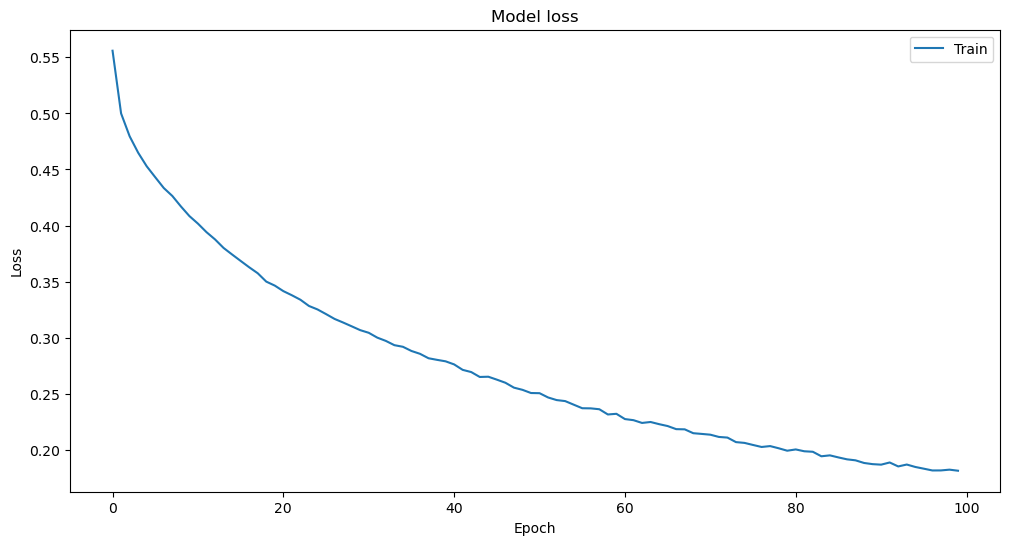

In [34]:
# Best hyperparameters
best_batch = grid_lstm_res.best_params_['batch_size']
best_epochs = grid_lstm_res.best_params_['epochs']

# Create a model with the best parameters
model = create_model()

# Fit the model
history = model.fit(x_train, y_train, epochs=best_epochs, batch_size=best_batch, verbose=1)

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


In [33]:
plt.plot(grid_lstm_res['loss'], label='Loss')
plt.legend()
plt.show()

TypeError: 'GridSearchCV' object is not subscriptable

In [35]:
# make a prediction
y_test_pre=model.predict(x_test)
# check length
y_test_pre.shape,y_test.shape

347/347 [==============================] - 0s 746us/step


((11095, 3), (11095, 3))

In [47]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [40]:
roc_auc_ltsm = roc_auc_score(y_test, y_test_pre,multi_class='ovr')
print(f"ROC AUC score: {roc_auc_ltsm}")
#print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
mse_lstm = mean_squared_error(y_test,y_test_pre)
rmse_lstm = sqrt(mse_lstm)
mape_lstm = mean_absolute_percentage_error(y_test,y_test_pre)
print(f"MSE: {mse_lstm*100}%")
print(f"RMSE: {rmse_lstm * 100}%")
print(f"MAPE: {mape_lstm}")

# Compute precision, recall, f1-score
precision_lstm = precision_score(y_test_labels, y_pred_lstm, average='macro')
recall_lstm = recall_score(y_test_labels, y_pred_lstm, average='macro')
f1_lstm = f1_score(y_test_labels, y_pred_lstm, average='macro')

print(f"Precision: {precision_lstm}")
print(f"Recall: {recall_lstm}")
print(f"F1-score: {f1_lstm}")

ROC AUC score: 0.9375463325916825
MSE: 3.6604229360818863%
RMSE: 19.132231798935237%
MAPE: 124716614418432.0
Precision: 0.8453296420153666
Recall: 0.6370750794138019
F1-score: 0.6994149955944652


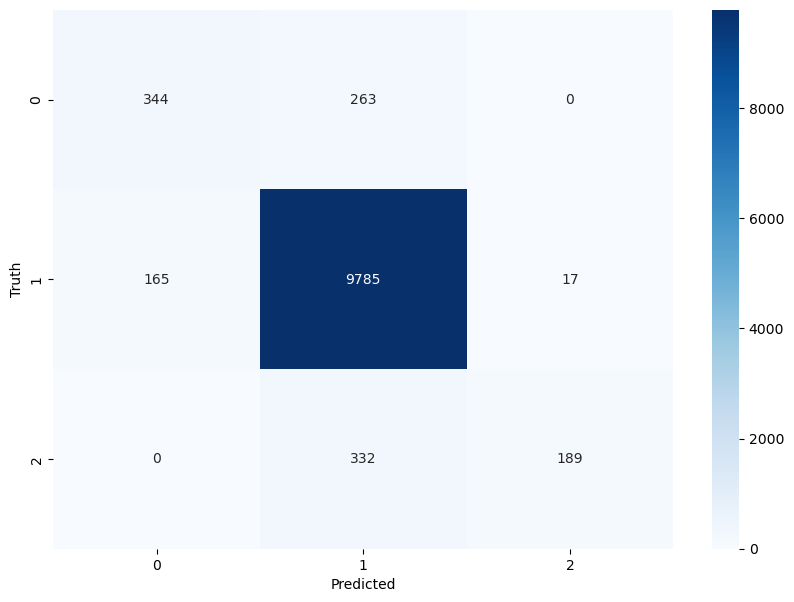

In [37]:
from sklearn.metrics import confusion_matrix

y_pred_lstm = np.argmax(y_test_pre,axis=1)
y_test_labels = np.argmax(y_test,axis=1)

cm = confusion_matrix(y_test_labels,y_pred_lstm)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_labels), yticklabels=np.unique(y_test_labels))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

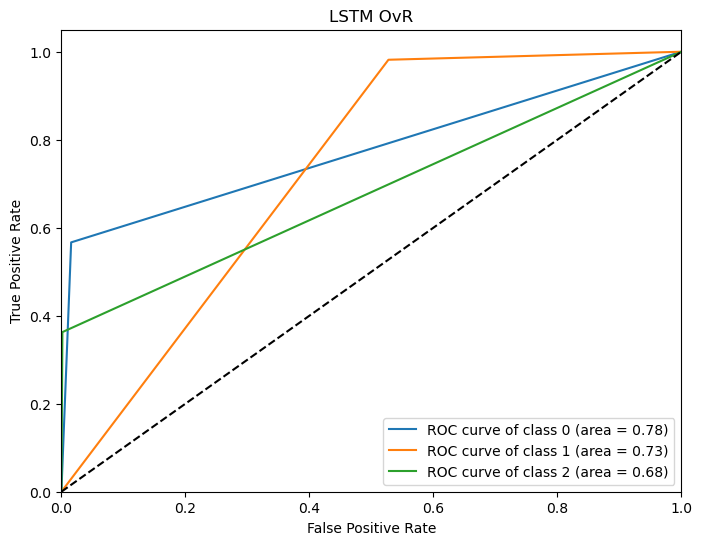

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)  # Fit has to happen only on y_train
y_test_binarized = label_binarizer.transform(y_test_labels)
y_pred_binarized = label_binarizer.transform(y_pred_lstm)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM OvR')
plt.legend(loc="lower right")
plt.show()

In [45]:
from keras.layers import GRU


y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
# design network for confirmed cases data 
model = Sequential()
model.add(GRU(60, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(3, activation='softmax'))  # 3 neurons in the output layer, one for each class
model.compile(loss='categorical_crossentropy', optimizer='adam')

# fit network
history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)


Epoch 1/30
888/888 [==============================] - 2s 1ms/step - loss: 0.5998
Epoch 2/30
888/888 [==============================] - 1s 1ms/step - loss: 0.5591
Epoch 3/30
888/888 [==============================] - 1s 1ms/step - loss: 0.5427
Epoch 4/30
888/888 [==============================] - 1s 1ms/step - loss: 0.5297
Epoch 5/30
888/888 [==============================] - 1s 1ms/step - loss: 0.5181
Epoch 6/30
888/888 [==============================] - 1s 1ms/step - loss: 0.5075
Epoch 7/30
888/888 [==============================] - 1s 1ms/step - loss: 0.4981
Epoch 8/30
888/888 [==============================] - 1s 1ms/step - loss: 0.4897
Epoch 9/30
888/888 [==============================] - 1s 1ms/step - loss: 0.4824
Epoch 10/30
888/888 [==============================] - 1s 1ms/step - loss: 0.4759
Epoch 11/30
888/888 [==============================] - 1s 1ms/step - loss: 0.4698
Epoch 12/30
888/888 [==============================] - 1s 1ms/step - loss: 0.4644
Epoch 13/30
888/888 [====

In [46]:
# make a prediction
y_pre_gru=model.predict(x_test)
# check length
y_pre_gru.shape,y_test.shape

347/347 [==============================] - 0s 737us/step


((11095, 3), (11095, 3))

In [21]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

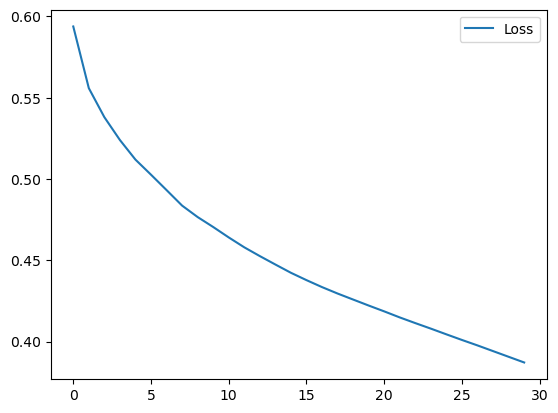

In [52]:
plt.plot(history.history['loss'], label='Loss')
plt.legend()

In [48]:
from math import sqrt
roc_auc_gru = roc_auc_score(y_test, y_pre_gru,multi_class='ovr')
print(f"ROC AUC score: {roc_auc_gru*100}")
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
mse_gru = mean_squared_error(y_test,y_pre_gru)
rmse_gru = sqrt(mse_gru)
mape_gru = mean_absolute_percentage_error(y_test,y_pre_gru)
print(f"MSE: {mse_gru*100}%")
print(f"RMSE: {rmse_gru * 100}%")
print(f"MAPE: {mape_gru}")

# Compute precision, recall, f1-score
precision_lstm = precision_score(y_test_labels, y_pred_gru, average='macro')
recall_lstm = recall_score(y_test_labels, y_pred_gru, average='macro')
f1_lstm = f1_score(y_test_labels, y_pred_gru, average='macro')

print(f"Precision: {precision_lstm}")
print(f"Recall: {recall_lstm}")
print(f"F1-score: {f1_lstm}")

ROC AUC score: 87.94883922192321
MSE: 4.976220428943634%
RMSE: 22.307443665609995%
MAPE: 180158157815808.0
Precision: 0.691208657202115
Recall: 0.40905419149471406
F1-score: 0.4465715282009575


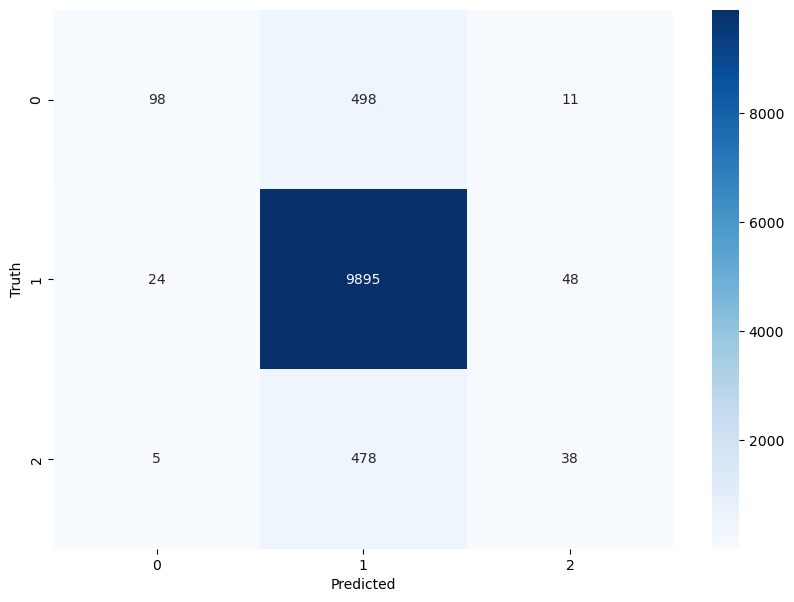

In [47]:
y_pred_gru = np.argmax(y_pre_gru,axis=1)
# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_gru)

# Display the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_labels), yticklabels=np.unique(y_test_labels))

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

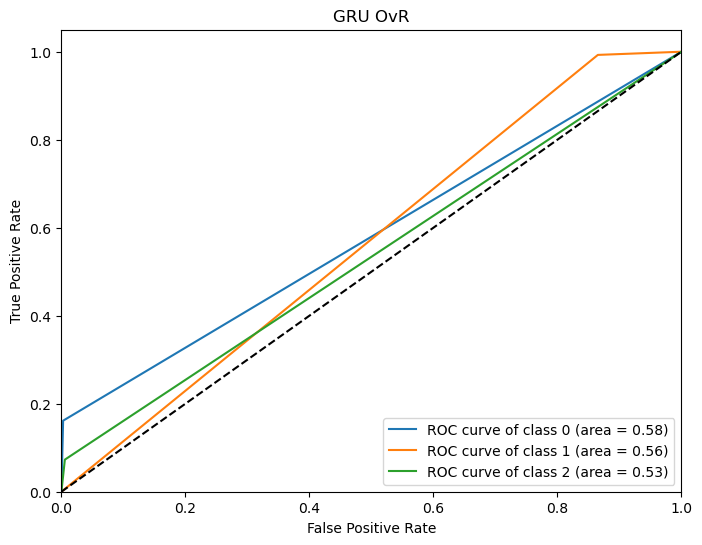

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)  # Fit has to happen only on y_train
y_test_binarized = label_binarizer.transform(y_test_labels)
y_pred_binarized = label_binarizer.transform(y_pred_gru)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GRU OvR')
plt.legend(loc="lower right")
plt.show()

In [52]:
seed = 7
tf.random.set_seed(seed)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

tscv = TimeSeriesSplit(n_splits=5)
# # design network for confirmed cases data 
def create_model():
    model = Sequential()
    model.add(GRU(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(3, activation='softmax'))  # 3 neurons in the output layer, one for each class
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

model_lstm = KerasClassifier(model=create_model,verbose=0)

batch_size = [10,20,30,40,60,80,100]
epochs = [10,50,100]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid_lstm = GridSearchCV(estimator=model_lstm,param_grid=param_grid,n_jobs=-1,cv=tscv)
grid_lstm_res = grid_lstm.fit(x_train,y_train)

print("Best: %f using %s" % (grid_lstm_res.best_score_,grid_lstm_res.best_params_))
# # fit network
#history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)


Best: 0.900608 using {'batch_size': 10, 'epochs': 100}


Epoch 1/100
4439/4439 [==============================] - 5s 981us/step - loss: 0.5491 - accuracy: 0.8205
Epoch 2/100
4439/4439 [==============================] - 4s 999us/step - loss: 0.4963 - accuracy: 0.8284
Epoch 3/100
4439/4439 [==============================] - 4s 951us/step - loss: 0.4745 - accuracy: 0.8313
Epoch 4/100
4439/4439 [==============================] - 4s 941us/step - loss: 0.4605 - accuracy: 0.8337
Epoch 5/100
4439/4439 [==============================] - 4s 949us/step - loss: 0.4489 - accuracy: 0.8364
Epoch 6/100
4439/4439 [==============================] - 4s 992us/step - loss: 0.4400 - accuracy: 0.8378
Epoch 7/100
4439/4439 [==============================] - 4s 971us/step - loss: 0.4304 - accuracy: 0.8414
Epoch 8/100
4439/4439 [==============================] - 4s 940us/step - loss: 0.4230 - accuracy: 0.8431
Epoch 9/100
4439/4439 [==============================] - 4s 934us/step - loss: 0.4136 - accuracy: 0.8475
Epoch 10/100
4439/4439 [==============================]

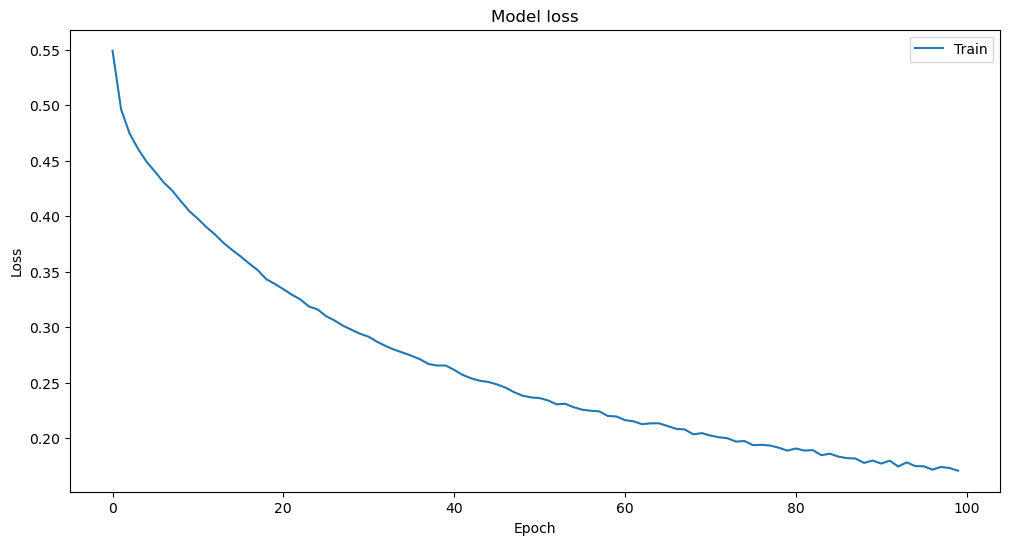

In [54]:
# Best hyperparameters
best_batch = grid_lstm_res.best_params_['batch_size']
best_epochs = grid_lstm_res.best_params_['epochs']

# Create a model with the best parameters
model = create_model()

# Fit the model
history = model.fit(x_train, y_train, epochs=best_epochs, batch_size=best_batch, verbose=1)

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


In [55]:
# make a prediction
y_pre_gru=model.predict(x_test)
# check length
y_pre_gru.shape,y_test.shape

347/347 [==============================] - 0s 657us/step


((11095, 3), (11095, 3))

In [22]:
from math import sqrt
roc_auc_gru = roc_auc_score(y_test, y_pre_gru,multi_class='ovr')
print(f"ROC AUC score: {roc_auc_gru*100}")
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
mse_gru = mean_squared_error(y_test,y_pre_gru)
rmse_gru = sqrt(mse_gru)
mape_gru = mean_absolute_percentage_error(y_test,y_pre_gru)
print(f"MSE: {mse_gru*100}%")
print(f"RMSE: {rmse_gru * 100}%")
print(f"MAPE: {mape_gru}")

# Compute precision, recall, f1-score
precision_lstm = precision_score(y_test_labels, y_pred_gru, average='macro')
recall_lstm = recall_score(y_test_labels, y_pred_gru, average='macro')
f1_lstm = f1_score(y_test_labels, y_pred_gru, average='macro')

print(f"Precision: {precision_lstm}")
print(f"Recall: {recall_lstm}")
print(f"F1-score: {f1_lstm}")

NameError: name 'y_pre_gru' is not defined

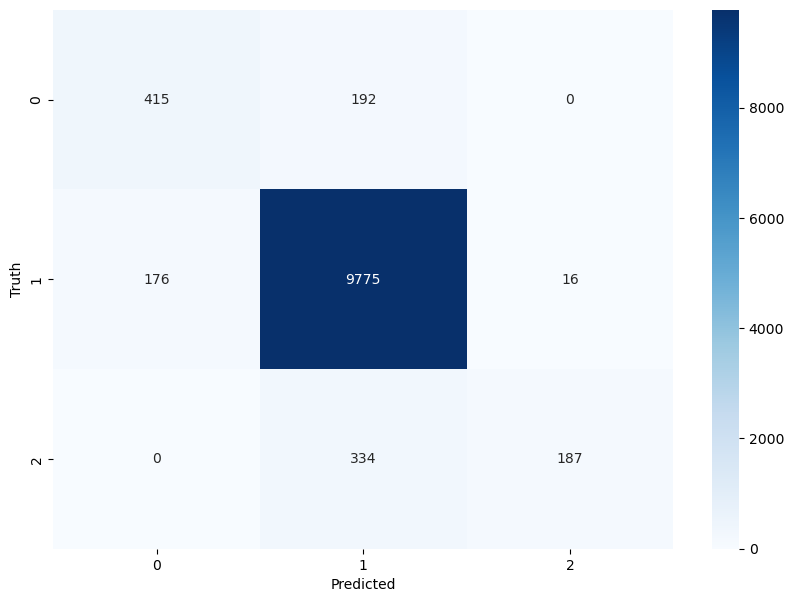

In [56]:
y_pred_gru = np.argmax(y_pre_gru,axis=1)
# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_gru)

# Display the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_labels), yticklabels=np.unique(y_test_labels))

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

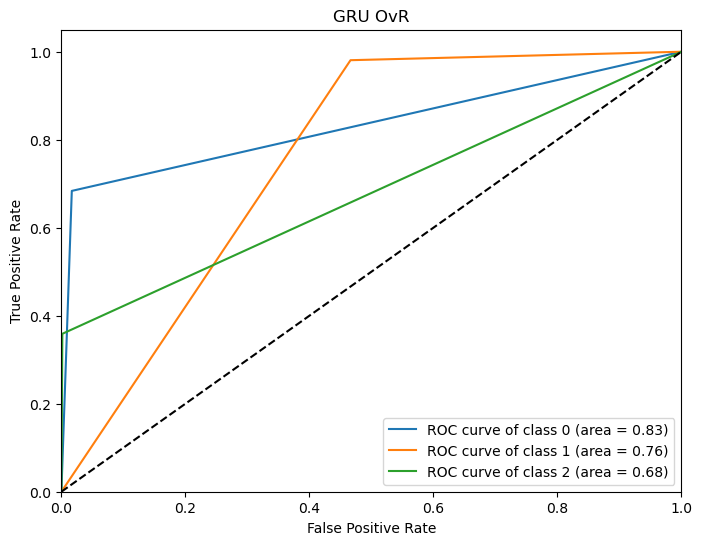

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the output
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_test)  # Fit has to happen only on y_train
y_test_binarized = label_binarizer.transform(y_test_labels)
y_pred_binarized = label_binarizer.transform(y_pred_gru)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GRU OvR')
plt.legend(loc="lower right")
plt.show()